In [1]:
__imp

Libraries have been loaded


## Load Additional Libraries

In [2]:
import scipy as sp

basepath = os.path.expanduser('../')

## Load Data

In [3]:
%%time

app_train = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/application_train.pkl'))
# app_test  = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/application_test.pkl'))

# bureau       = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/bureau.pkl'))
# bureau_bal   = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/bureau_balance.pkl'))
prev_app     = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/previous_application.pkl'))
# installments = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/installments_payments.pkl')) 
# pos_cash     = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/POS_CASH_balance.pkl'))
credit_bal   = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/credit_card_balance.pkl'))

CPU times: user 180 ms, sys: 621 ms, total: 800 ms
Wall time: 6.51 s


In [16]:
app_train.TARGET.value_counts(normalize=True)

0.0    0.919271
1.0    0.080729
Name: TARGET, dtype: float64

In [42]:
ss = app_train.loc[:, ['SK_ID_CURR', 'TARGET']]\
              .merge(prev_app.loc[prev_app.NAME_CONTRACT_STATUS == 'Approved', ['SK_ID_CURR', 'SK_ID_PREV']], how='left')\
              .merge(credit_bal.loc[credit_bal.MONTHS_BALANCE > -12, [
                                        'SK_ID_CURR', 
                                        'SK_ID_PREV',
                                        'MONTHS_BALANCE',
                                        'AMT_BALANCE']], how='left')

In [53]:
tmp = ss.loc[(ss.TARGET == 1) &\
       (ss.MONTHS_BALANCE.notnull()),
       ['SK_ID_CURR', 'SK_ID_PREV']].drop_duplicates().astype(np.int)

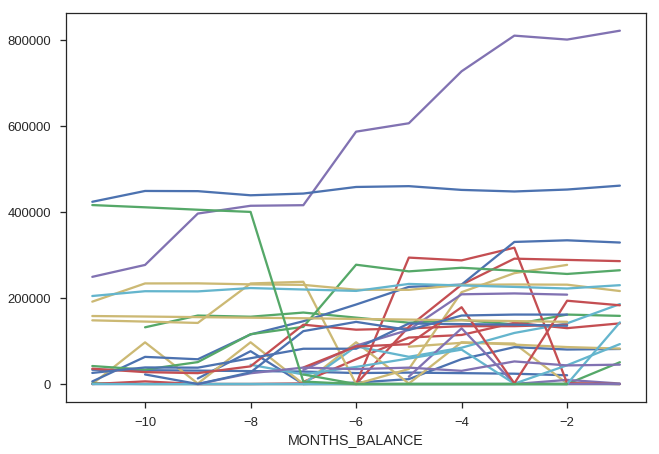

In [54]:
possibilities = tmp.sample(n=50)

for curr, prev in possibilities.values:
    mask = (ss.SK_ID_CURR == curr) & (ss.SK_ID_PREV == prev)
    
    if ss.loc[mask, 'AMT_BALANCE'].sum() != 0:
        ss.loc[mask,].sort_values(by='MONTHS_BALANCE')[['MONTHS_BALANCE', 'AMT_BALANCE']]\
           .set_index('MONTHS_BALANCE')['AMT_BALANCE'].plot()

In [51]:
tmp = ss.loc[(ss.TARGET == 0) &\
       (ss.MONTHS_BALANCE.notnull()),
       ['SK_ID_CURR', 'SK_ID_PREV']].drop_duplicates().astype(np.int)

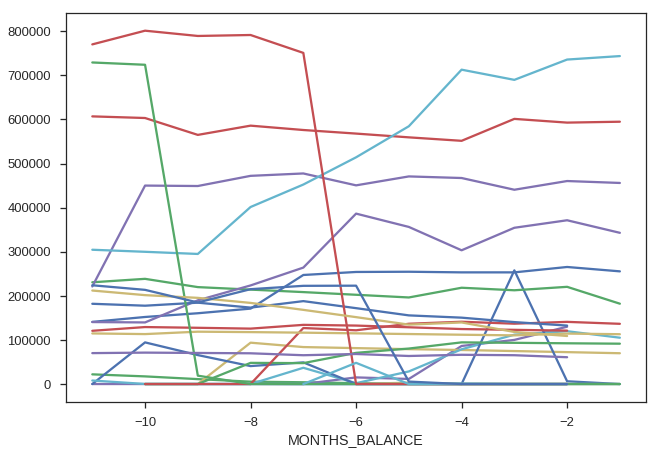

In [52]:
possibilities = tmp.sample(n=50)

for curr, prev in possibilities.values:
    mask = (ss.SK_ID_CURR == curr) & (ss.SK_ID_PREV == prev)
    
    if ss.loc[mask, 'AMT_BALANCE'].sum() != 0:
        ss.loc[mask,].sort_values(by='MONTHS_BALANCE')[['MONTHS_BALANCE', 'AMT_BALANCE']]\
           .set_index('MONTHS_BALANCE')['AMT_BALANCE'].plot()